# Assignment 2: Linear Regression

## Janelle Domantay   
## Dylan Obata

## Dataset and Source
For our project, we used The Complete Pokemon Dataset found on Kaggle. https://www.kaggle.com/rounakbanik/pokemon

## Characteristics
Our dataset has 13 features, consisting of:
* 6 Categorical Features (#, Name, Type 1, Type 2, Generation, and Legendary)
* 7 Quantatative Features (Total, HP, Attack, Defense, Sp. Atk, Sp Def. Defense, and Speed)

In [1]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn import metrics
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

poke_df = pd.read_csv("Pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Data Preprocessing
In order to apply regression, we had to remove the categorical data features 
* #
* Name
* Type 1
* Type 2
* Generation
* Legendary

Additionally, we removed the quantatative features 
* Special Attack
* Special Defense

In order to reduce the dimensionality of our data.

In [2]:
poke_stats = ['HP', "Attack", "Defense", "Speed"]
poke_df = poke_df.drop(columns = ['#','Name', 'Type 1', 'Type 2', 'Total', 'Sp. Atk', 'Sp. Def', 'Generation', "Legendary"])
poke_df.head()

,HP,Attack,Defense,Speed
0,45,49,49,45
1,60,62,63,60
2,80,82,83,80
3,80,100,123,80
4,39,52,43,65


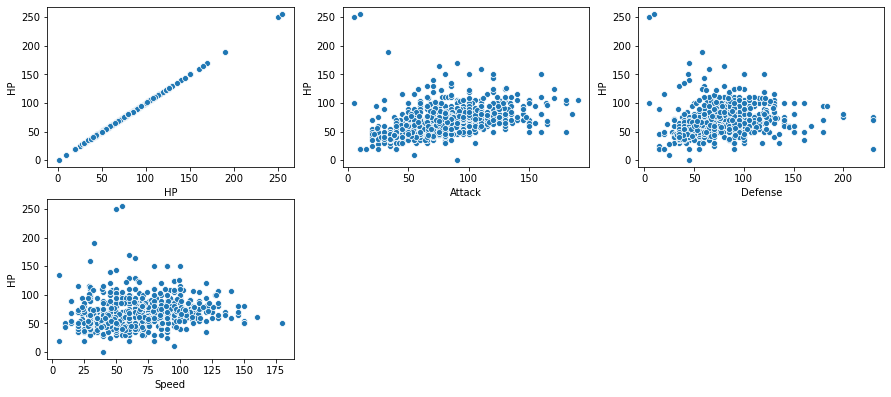

In [3]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')

In [4]:
#preprocessing independent variables
x = poke_df.iloc[:,1:4] 
atk = poke_df.iloc[:,1]
dfs = poke_df.iloc[:,2]
spd = poke_df.iloc[:,3]
x

,Attack,Defense,Speed
0,49,49,45
1,62,63,60
2,82,83,80
3,100,123,80
4,52,43,65
...,...,...,...
795,100,150,50
796,160,110,110
797,110,60,70
798,160,60,80


In [5]:
#preprocessing dependent variables
y = poke_df.iloc[:,0]
print(y)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64


In [27]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1) #20% testing

# Linear Regression with Ordinary Least Squares

**For the Ordinary Least Squares Model, we had to add the constant term parameter vector.**

In [28]:
x_trainnc = x_train
x_train = sm.add_constant(x_train) #add constant term

## Results for Ordinary Least Square Model
After running the OLS model on our dataset we see that the linear equation that best fits our data is given by

$\hat{w} = 0.2940x_1 + 0.0421x_2 + 0.0089x_3 + 37.2368$

where the bias is 37.2368.

We also provide relevant metrics:
* $r^2=0.16$
* Absolute Error for Training Set = 15.291428398303669
* Mean Square Error for Training Set = 534.7590917537507
* Root Mean Square Error for Training Set = 23.12485874019019

* Absolute Error for Test Set = 16.501750718281876
* Mean Square Error for Test Set = 719.8984189650921
* Root Mean Square Error for Test Set = 26.830922812402335

Our low $r^2$ value shows that the data was not well modeled by linear regression.

In [29]:
result = sm.OLS(y_train, x_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     38.76
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           5.18e-23
Time:                        15:10:37   Log-Likelihood:                -2954.9
No. Observations:                 640   AIC:                             5918.
Df Residuals:                     636   BIC:                             5936.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.3387      3.444     12.002      0.000      34.575      48.102
Attack         0.2834      0.036      7.942      0.000       0.213       0.353
Defense        0.0526      0.035      1.492      0.136      -0.017       0.122
Speed          0.0284      0.037      0.766      0.444      -0.044       0.101
==============================================================================
Omnibus:                      441.563   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8900.035
Skew:                           2.777   Prob(JB):                         0.00
Kurtosis:                      20.404   Cond. No.                         476.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

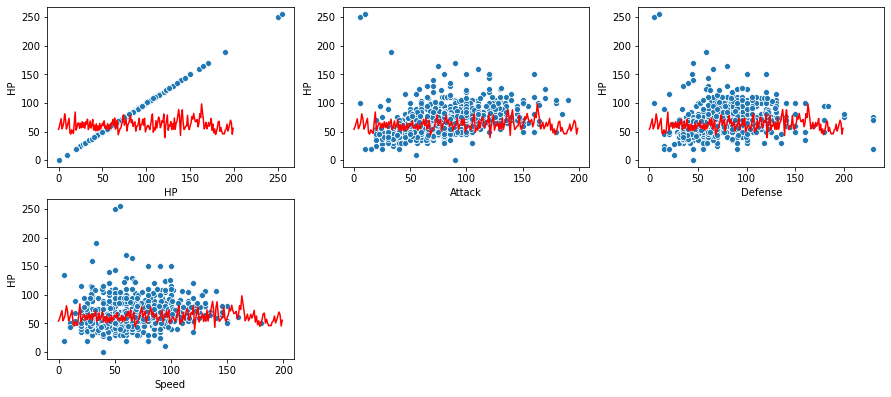

In [30]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,200,1)
    bias = 37.2368
    py = (0.2940 * atk[px]) + (.0421 * dfs[px]) + (.0089*spd[px]) + bias
    plt.plot(py, 'r')
    plt.show
    
#g(x) = 0.2940*x_1 + 0.0421*x_2 + 0.0089*x_3 + 37.2368

In [31]:
ypred = result.predict(x_train)
print("The Absoulte Error for the Training set is", 
    metrics.mean_absolute_error(y_train, ypred)) #Absolute error

print("The Mean Squared Error for the Training set is", 
      metrics.mean_squared_error(y_train, ypred)) #MSE

print("The Root Mean Squared Error for the Training set is",
      np.sqrt(metrics.mean_squared_error(y_train,ypred))) #RMSE

The Absoulte Error for the Training set is 16.421384988622584
The Mean Squared Error for the Training set is 599.5709489198949
The Root Mean Squared Error for the Training set is 24.486137893099738


In [32]:
x_testnc = x_test #no constant
x_test = sm.add_constant(x_test)
ypred = result.predict(x_test)
print(ypred)
print(y_test)

8      77.756804
510    73.063196
175    56.733059
735    60.605162
242    76.322128
         ...    
359    72.333003
732    54.356803
714    69.546040
592    67.900212
108    55.309953
Length: 160, dtype: float64
8      78
510    90
175    35
735    62
242    75
       ..
359    45
732    38
714    91
592    75
108    40
Name: HP, Length: 160, dtype: int64


In [33]:
#calculating errors
print("The Absolute Error for the Test set is"
      ,metrics.mean_absolute_error(y_test, ypred))#Absolute error
print("The Mean Squared Error for the Test set is",
      metrics.mean_squared_error(y_test, ypred))#MSE
print("The Root Mean Squared Error for the Test set is",
      np.sqrt(metrics.mean_squared_error(y_test,ypred)))

The Absolute Error for the Test set is 12.290737711050658
The Mean Squared Error for the Test set is 264.61837029969104
The Root Mean Squared Error for the Test set is 16.267094709864175


# Linear Regression with Gradient Descent

In [34]:
#gradient descent
sgdr = SGDRegressor(max_iter = 1000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True, learning_rate = 'constant')
sgdr.fit(x_trainnc, y_train)

SGDRegressor(average=True, learning_rate='constant', loss='huber',
             penalty='elasticnet')

## Results for Linear Regression with Gradient Descent

After running the LR with Gradient Descent model on our dataset we see that the linear equation that best fits our data is given by

$\hat{w} =  0.36384525x_1 + 0.27076375x_2 + 0.25237602x_3 + 0.29716996$

where the bias is 0.29716996.


We also provide relevant metrics:
* Mean Absolute Error for the Training set is 16.58126437534663
* Mean Squared Error for the Training set is 678.9338650222622
* Root Mean Squared Error for the Training set is 26.05635939693537
* Mean Absolute Error for the Test set is 15.120392095929683
* Mean Squared Error for the Test set is 569.9625798593513
* Root Mean Squared Error for the Test set is 23.873889081156243


Iterations until Convergence: 7

Learning Rate: 0.01


In [35]:
lgpred = sgdr.predict(x_testnc)
print(lgpred)

[ 82.83016041  68.30267228  30.98470404  51.26469927  69.47300538
  39.53867043  97.90081917  90.97646408  80.3415261   72.0756763
  30.81240326  70.98561554  31.67336187  94.75557147  86.86334027
  98.24201878  82.76310701  47.28012422 116.1519527   43.57266108
  39.33810288  85.62972908  50.83103614  72.12309458  93.95977683
  69.62027177  42.3946162   71.38820381  69.45444771  58.26273972
  84.51091796  70.05075107  99.41046599  61.94501205  74.61987456
  66.2845995   42.90115627  51.23076777  78.6921089   44.99383664
  30.49251007  67.18223838  45.58302208  50.48983652  54.64941141
  57.47924533  26.88306614  81.94341596  42.48615987  60.6643595
  61.79908978  85.99278044  63.81527312  63.92192515  58.45316429
  62.80068046  43.89185253  45.90884785  60.14233652  45.2571963
  97.38246481  58.17939262  66.12734655  58.56963329  76.72264092
  78.66573039  52.9760978   35.71328511  56.07544211  84.15919964
  50.69914358  67.64939796  50.84047738  86.37713824  74.1291943
  89.79022501 

In [36]:
metrics.r2_score(y_test, lgpred)

0.16741508197136468

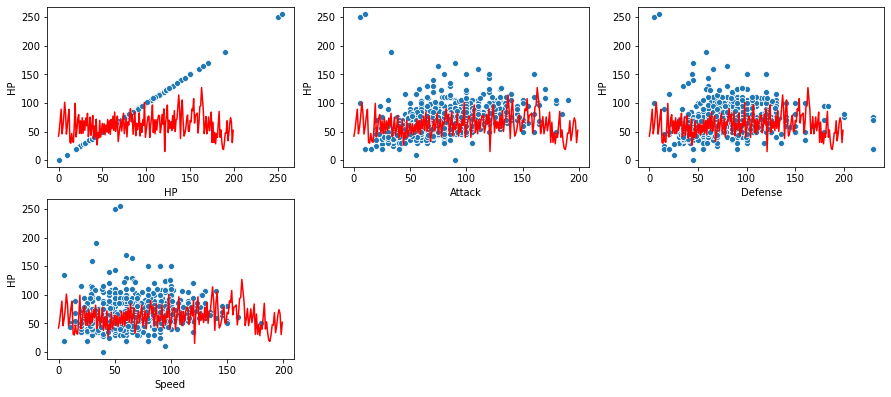

In [37]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,200,1)
    bias = 20
    py = (sgdr.coef_[0] * atk[px]) + (sgdr.coef_[1] * dfs[px]) + (sgdr.coef_[2]*spd[px]) + sgdr.intercept_
    plt.plot(py, 'r')
    plt.show
    
#g(x) = 0.36384525*x_1 + 0.27076375*x_2 + 0.25237602*x_3 + 0.29716996

In [38]:
#print GD 
#print("Average Intercept ", sgdr.average_intercept_)
print("Intercept: ", sgdr.intercept_)
print("Iterations until Convergence: ", sgdr.n_iter_)
print("Learning Rate: 0.01")

Intercept:  [0.29368829]
Iterations until Convergence:  12
Learning Rate: 0.01


In [39]:
lgpred = sgdr.predict(x_trainnc)
print("The Mean Absolute Error for the Training set is",
      metrics.mean_absolute_error(y_train, lgpred)) #Absolute error
print("The Mean Squared Error for the Training set is", 
      metrics.mean_squared_error(y_train, lgpred)) #MSE
print("The Root Mean Squared Error for the Training set is",
      np.sqrt(metrics.mean_squared_error(y_train,lgpred))) #RMSE

The Mean Absolute Error for the Training set is 16.898845949833117
The Mean Squared Error for the Training set is 735.1670234545281
The Root Mean Squared Error for the Training set is 27.113963624939238


In [40]:
lgpred = sgdr.predict(x_testnc)
print(lgpred)

[ 82.83016041  68.30267228  30.98470404  51.26469927  69.47300538
  39.53867043  97.90081917  90.97646408  80.3415261   72.0756763
  30.81240326  70.98561554  31.67336187  94.75557147  86.86334027
  98.24201878  82.76310701  47.28012422 116.1519527   43.57266108
  39.33810288  85.62972908  50.83103614  72.12309458  93.95977683
  69.62027177  42.3946162   71.38820381  69.45444771  58.26273972
  84.51091796  70.05075107  99.41046599  61.94501205  74.61987456
  66.2845995   42.90115627  51.23076777  78.6921089   44.99383664
  30.49251007  67.18223838  45.58302208  50.48983652  54.64941141
  57.47924533  26.88306614  81.94341596  42.48615987  60.6643595
  61.79908978  85.99278044  63.81527312  63.92192515  58.45316429
  62.80068046  43.89185253  45.90884785  60.14233652  45.2571963
  97.38246481  58.17939262  66.12734655  58.56963329  76.72264092
  78.66573039  52.9760978   35.71328511  56.07544211  84.15919964
  50.69914358  67.64939796  50.84047738  86.37713824  74.1291943
  89.79022501 

In [41]:
print("The Mean Absolute Error for the Test set is",
      metrics.mean_absolute_error(y_test, lgpred)) #Absolute error
print("The Mean Squared Error for the Test set is",
      metrics.mean_squared_error(y_test, lgpred)) #MSE
print("The Root Mean Squared Error for the Test set is",
      np.sqrt(metrics.mean_squared_error(y_test,lgpred))) #RMSE

The Mean Absolute Error for the Test set is 13.931933788648928
The Mean Squared Error for the Test set is 345.7612960746079
The Root Mean Squared Error for the Test set is 18.594657729428846


In [42]:
print("The coefficients are: ", sgdr.coef_)

The coefficients are:  [0.36035113 0.27733004 0.23428211]
